In [1]:
from datasets import get_japanese_vowels, get_spoken_digits
import utils
from visualization import save_plot

import numpy as np
import seaborn as sns

import os

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from scipy.io.wavfile import read

In [2]:
X_train_vowels, y_train_vowels, X_test_vowels, y_test_vowels = get_japanese_vowels()
X_digits, y_digits_num, y_digits_speaker = get_spoken_digits()

In [3]:
COLOR_PALETTE = ["#800000", "#9A6324", "#e6194B", "#f58231", "#ffe119", "#bfef45", 
                 "#3cb44b", "#42d4f4", "#4363d8", "#000075", "#911eb4", "#f032e6"]

In [4]:
def plot_recording(ax, rec_data, title=None):
    [ax.plot(x, color=COLOR_PALETTE[i]) for i, x in enumerate(rec_data)]
    ax.set_xlim(0, 22)
    ax.set_ylim(-1.5, 2)
    if title:
        ax.title.set_text("$\it{" + title + "}$")

In [5]:
def add_axis_labels(fig):
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Timestep")
    plt.ylabel("Amplitude")

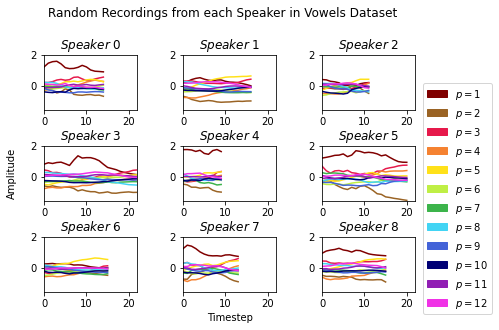

In [6]:
def show_random_points(X):
    utils.seed()
    fig, ax = plt.subplots(nrows=3, ncols=3)
    fig.tight_layout(pad=1.5)

    max_range = 30
    min_range = 0
    count = 0

    for row in ax:
        for col in row:
            random_point = np.random.randint(min_range, max_range)
            min_range += 30
            max_range += 30
            plot_recording(col, X[random_point].T, title="Speaker \;" + str(count))
            count += 1

    utils.seed()
    add_axis_labels(fig)
    fig.suptitle("Random Recordings from each Speaker in Vowels Dataset", y=1.1)
    patches = [mpatches.Patch(color=c, label="$\it{p=}$" + str(i + 1)) for i, c in enumerate(COLOR_PALETTE)]
    plt.legend(handles=patches, bbox_to_anchor=(1.22, 0.9))
    save_plot("rand_speakers_vowels")
    plt.show()

show_random_points(X_train_vowels)

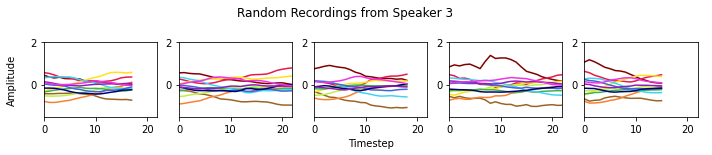

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 2))
speaker = 3

for i, col in enumerate(ax):
    plot_recording(col, X_train_vowels[np.random.randint(speaker * 30, (speaker * 30) + 30)].T)

utils.seed()
add_axis_labels(fig)
fig.suptitle("Random Recordings from Speaker " + str(speaker), y=1.1)
fig.tight_layout(pad=0)
save_plot("speaker_" + str(speaker))
plt.show()

Min length: 7 Max length: 26 Mean: 15.829629629629629
Min length: 7 Max length: 29 Mean: 15.37027027027027
Min length: 9 Max length: 152 Mean: 28.657666666666668


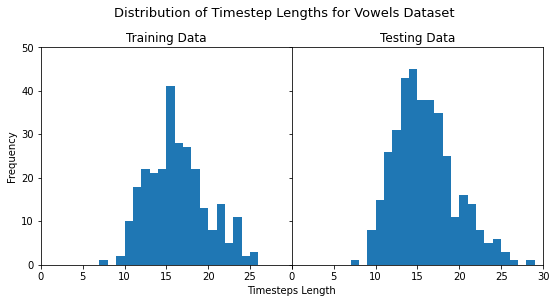

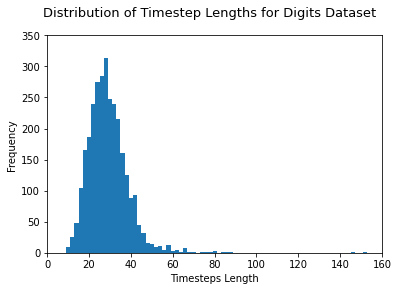

In [8]:
def plot_rec_len_freq(data_ls, ax, title="", binwidth=1, xmax=30, 
                      xlab=None, ylim=50):
    lens = [x.shape[0] for x in data_ls]
    min_, max_ = min(lens), max(lens)
    print("Min length:", min_, "Max length:", max_, "Mean:", np.mean(lens))
    ax.hist(lens, bins=np.arange(np.min(lens), np.max(lens) + binwidth, binwidth))
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ylim)
    if xlab:
        ax.set_xlabel(xlab)
    ax.set_ylabel("Frequency")
    ax.set_title(title)

fig = plt.figure(figsize=(9, 4))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
(ax1, ax2) = gs.subplots(sharey=True)
fig.suptitle("Distribution of Timestep Lengths for Vowels Dataset", y=1.02, fontsize=13)

plot_rec_len_freq(X_train_vowels, ax1, title="Training Data", xmax=30)
plot_rec_len_freq(X_test_vowels, ax2, title="Testing Data")
plt.setp(ax1.get_xticklabels()[-1], visible=False)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Timesteps Length")
ax2.set_ylabel("")

save_plot("vowels_lengths")

fig, ax = plt.subplots(1, 1)
fig.suptitle("Distribution of Timestep Lengths for Digits Dataset", fontsize=13)
plot_rec_len_freq(X_digits, ax, xmax=160, binwidth=2, ylim=350, xlab="Timesteps Length")
save_plot("digits_lengths")

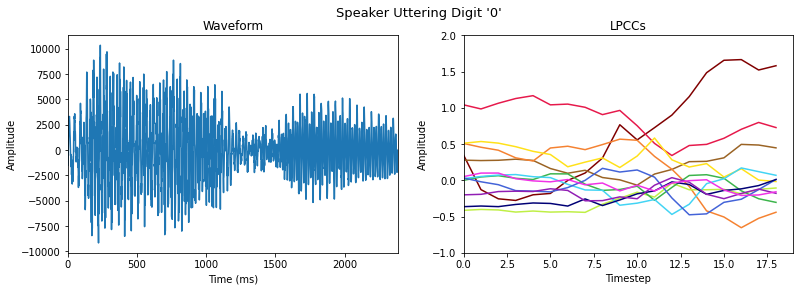

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

a = read(os.path.join("spoken_digits", "wav_digits", "0_george_0.wav"))[1]    
ax1.plot(a)
ax1.set_xlim(0, len(a))
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Amplitude")
ax1.set_title("Waveform")

plot_recording(ax2, X_digits[0].T)
ax2.set_xlim(0, len(X_digits[0]))
ax2.set_ylim(-1, 2)
ax2.set_xlabel("Timestep")
ax2.set_ylabel("Amplitude")
ax2.set_title("LPCCs")

fig.suptitle("Speaker Uttering Digit '0'", fontsize=13)
save_plot("digits_wav")
plt.show()

In [10]:
X_train_vowels_uni_29 = utils.uniform_scaling(X_train_vowels, 29)
X_train_vowels_uni_15 = utils.uniform_scaling(X_train_vowels, 15)

In [11]:
def plot_single(ax, X, title):
    [ax.plot(x, color=COLOR_PALETTE[i]) for i, x in enumerate(X.T)]
    ax.set_xlim(0, 29)
    ax.set_xticks(range(0, 30, 5))
    ax.set_title(title)

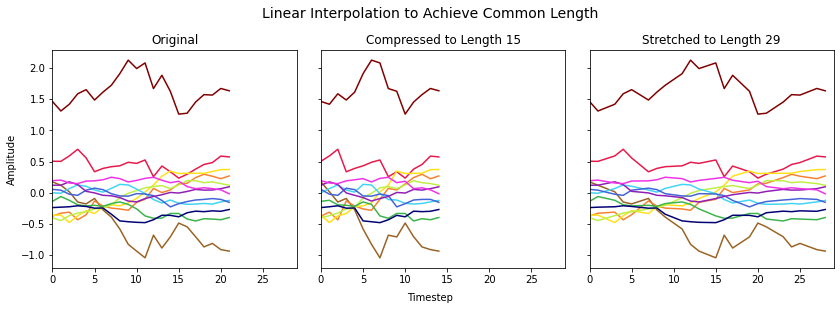

In [12]:
fig = plt.figure(figsize=(14, 4))
gs = fig.add_gridspec(1, 3, hspace=0, wspace=0.1)
(ax1, ax2, ax3) = gs.subplots(sharex=True, sharey=True)

idx = 2

plot_single(ax1, X_train_vowels[idx], "Original")
ax1.set_ylabel("Amplitude")
plot_single(ax2, X_train_vowels_uni_15[idx], "Compressed to Length 15")
plot_single(ax3, X_train_vowels_uni_29[idx], "Stretched to Length 29")
fig.text(0.5, 0.01, 'Timestep', ha='center')
fig.suptitle("Linear Interpolation to Achieve Common Length", fontsize=14, y=1.03)
save_plot("uniform_length")